In [1]:
import numpy as np
from sknetwork.clustering import Louvain, get_modularity
from sklearn.cluster import KMeans
from sknetwork.embedding import GSVD
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph
import geopandas as gpd
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
adj = np.loadtxt("GCC-part/adjacency_matrix.txt", comments="#", delimiter=" ", unpack=False)

In [3]:
adj-=np.diag(np.diag(adj))

In [4]:
adj

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [5]:
louvain = Louvain()
labels = louvain.fit_transform(adj)

In [36]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [142 126 114 108 100  91  87  87  78  77  69  67  58  56  48  48  34]


In [7]:
len(labels)

1390

In [8]:
get_modularity(adj, labels)

0.8595856754077307

In [9]:
geo = gpd.read_file("joined_data/WIct.shp")

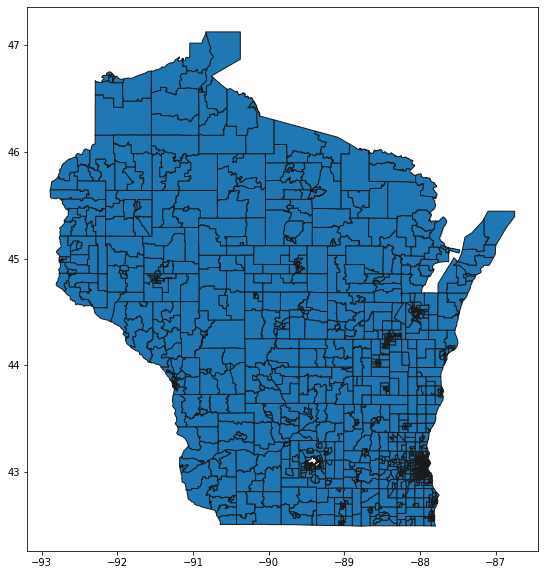

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
geo.plot(ax=ax,edgecolor='0.1')
plt.savefig("WIct.png")

In [11]:
simple = geo[["ct","geometry"]].copy()

In [12]:
simple

,ct,geometry
0,55001950100,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,55001950202,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,55001950400,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...
1385,55141011300,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1386,55141011400,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1387,55141011500,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1388,55141011600,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."


In [13]:
simple["labels"] = labels

<AxesSubplot:>

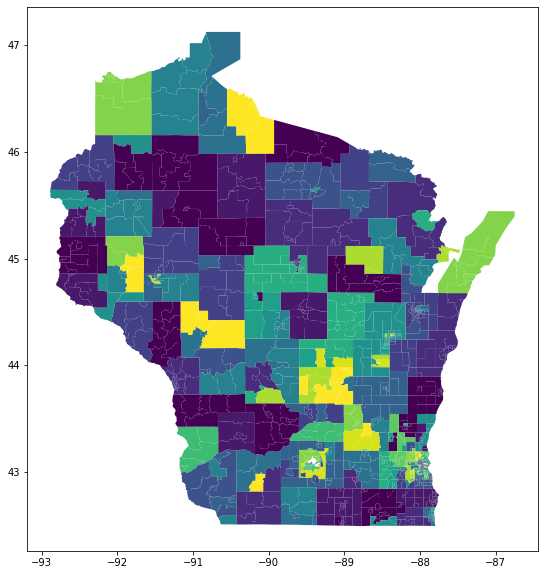

In [14]:
simple.plot(column="labels",figsize=(10,10))

In [15]:
df = pd.read_csv("joined_data/joined_data_CHR_simplified.csv")

In [16]:
sub = df[['poverty_score',"age", 'median_age_no_insurance', 'hispanic_prop',
       'MFratio', 'household_median_income', 'white', 'black', 'native',
       'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop']]

In [17]:
attr = np.array(sub)

In [18]:
sc = StandardScaler()
attr_norm = sc.fit_transform(attr)

In [19]:
attr

array([[5.43144000e+03, 5.38003407e+01, 3.75000000e+01, ...,
        1.46000000e+02, 2.40000000e+01, 2.93500000e+03],
       [2.30987000e+03, 4.96128071e+01, 3.63829787e+01, ...,
        3.00000000e+01, 0.00000000e+00, 1.34300000e+03],
       [4.33765000e+03, 5.22477722e+01, 3.99230769e+01, ...,
        5.80000000e+01, 3.00000000e+00, 2.58100000e+03],
       ...,
       [1.11261100e+04, 4.19909138e+01, 3.03876404e+01, ...,
        3.24000000e+02, 6.40000000e+01, 5.83300000e+03],
       [8.85504000e+03, 4.45145775e+01, 4.12140411e+01, ...,
        1.60000000e+02, 0.00000000e+00, 5.04200000e+03],
       [7.24562000e+03, 4.13000888e+01, 3.16646778e+01, ...,
        1.75000000e+02, 1.20000000e+01, 4.50200000e+03]])

In [20]:
silhouette_score(attr_norm, labels)

-0.09280141923434859

In [33]:
s_scores = []
m_scores = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(attr_norm)
    l = kmeans.labels_
    s_scores.append(silhouette_score(attr_norm, l))
    m_scores.append(get_modularity(adj, l))
    print(i, silhouette_score(attr_norm, l),get_modularity(adj, l))


2 0.22241203144292956 0.07505748923880651
3 0.2309921815980715 0.12430186510111141
4 0.18950516891387753 0.11283769094153112
5 0.20545669548623616 0.11388071101415709
6 0.19768274898344892 0.10998674308348788
7 0.2254882241027797 0.10852535184247314
8 0.16850357523963191 0.11185060207538519
9 0.16927865495428968 0.12485130484130166
10 0.15232161354153623 0.11656723979280578
11 0.1563684813809714 0.11005430568335695
12 0.16129481933371304 0.11581457376256299
13 0.1598992343938433 0.12031840006019576
14 0.15459654548325752 0.1109484869998355
15 0.13715373727816357 0.09405518047901791
16 0.1408359552430824 0.1063329418866865
17 0.14079470638851838 0.09755827615282885
18 0.13971457644683377 0.08891370970799158
19 0.14251921224260924 0.09532124328969108


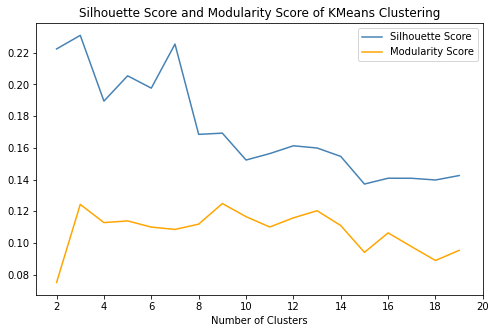

In [34]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(s_scores,color = "steelblue")
ax.plot(m_scores,color = "orange")
plt.xticks([0,2,4,6,8,10,12,14,16,18],labels=[2,4,6,8,10,12,14,16,18,20])
plt.title("Silhouette Score and Modularity Score of KMeans Clustering")
plt.xlabel("Number of Clusters")
plt.legend(["Silhouette Score","Modularity Score"])
plt.savefig("KMeans.png")

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(attr_norm)

KMeans(n_clusters=3)

In [40]:
get_modularity(adj, kmeans.labels_)

0.12551519174854758

In [41]:
silhouette_score(attr_norm, kmeans.labels_)

0.22971770264096109

In [42]:
unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
print(unique_labels, counts)

[0 1 2] [201 397 792]


In [27]:
simple["labels"] = kmeans.labels_

<AxesSubplot:>

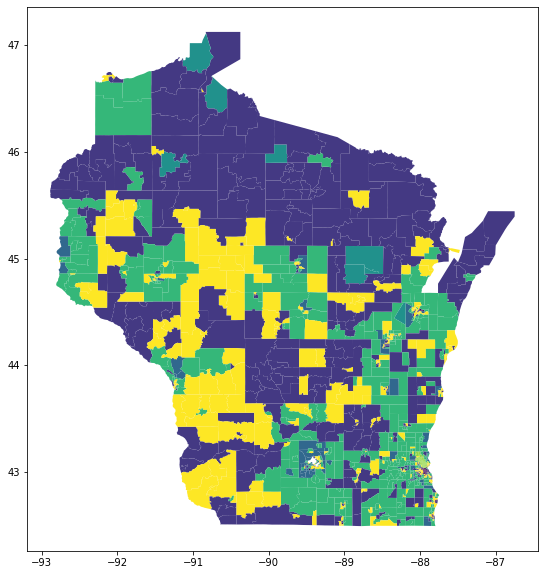

In [28]:
simple.plot(column="labels",figsize=(10,10))

In [37]:
np.savetxt("Louvain_cluster.txt", labels, delimiter=" ")

In [43]:
np.savetxt("KMeans_cluster.txt", kmeans.labels_, delimiter=" ")

In [31]:
s_scores=[]
m_scores=[]
for i in range(2,20):
    labs = np.loadtxt("STICC-part/result_synthetic_data_joined_"+str(i)+".txt", comments="#", delimiter=" ", unpack=False)
    s_scores.append(silhouette_score(attr_norm, labs.astype(int)))
    m_scores.append(get_modularity(adj, labs.astype(int)))
    print(i,get_modularity(adj, labs.astype(int)),silhouette_score(attr_norm, labs.astype(int)))

2 0.1441517354038937 0.08222144444908323
3 0.19458585203259515 0.08647312262600257
4 0.23506432160544471 0.0213967070654359
5 0.262059206089912 0.009083079735996695
6 0.24548859893692102 0.008961416305679216
7 0.24110198405723796 -0.00013872894202785025
8 0.2719112116867657 0.0066649077500579084
9 0.2586016308075113 -0.029648560497637616
10 0.2702382296042798 -0.052757783533643146
11 0.2833794424742873 -0.0387649180912491
12 0.2603625304282994 -0.10942673821208306
13 0.2475577663818839 -0.04630620429228308
14 0.24911486532282442 -0.0543019752965349
15 0.28908079969993866 -0.06655228126637336
16 0.24594904415793875 -0.047220111598825235
17 0.25470629870107475 -0.08689086746531269
18 0.2611070832026595 -0.05869340370260628
19 0.25261354537507075 -0.0982494524064027


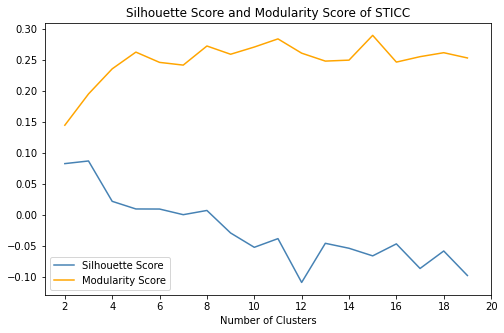

In [32]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(s_scores,color = "steelblue")
ax.plot(m_scores,color = "orange")
plt.xticks([0,2,4,6,8,10,12,14,16,18],labels=[2,4,6,8,10,12,14,16,18,20])
plt.title("Silhouette Score and Modularity Score of STICC")
plt.xlabel("Number of Clusters")
plt.legend(["Silhouette Score","Modularity Score"])
#plt.savefig("STICC.png")